<a href="https://colab.research.google.com/github/guzelbakhitova/GSB-test/blob/main/Choosing_the_right_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Define the problem domain

In [ ]:
# This is regression model. Based on the data provided i try to predict what price automobiles will be on the market.

In [ ]:
!pip install azureml-core 
!pip install azureml-dataprep

In [75]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'f8be1e0d-ae00-4111-ac28-4d29e8b059fc'
resource_group = 'gsbresourcegroup'
workspace_name = 'gsbworkspace'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Automobilepricedata2')
data=dataset.to_pandas_dataframe()
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Q. Identify candidate questions for your machine learning project

In [ ]:
# Using given data i try to predict what price automobile will be on the market 
# I use a regression model for ML 

### Q. Identify a suitable dataset for your canditate question(s)

In [ ]:
# I used "Automobile price data _Raw_" dataset

### Q. Generate a descriptive statistics report for the columns in your dataset

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [79]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [80]:
data.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606,-0.082391
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082,0.584642
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662,0.690628
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218,0.751265
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470,0.872335
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201,0.071107
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337,-0.686571
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000,-0.704692


# Part 2: Data Preparation

In [ ]:
# There are no data points missing

# Part 3: Model Selection

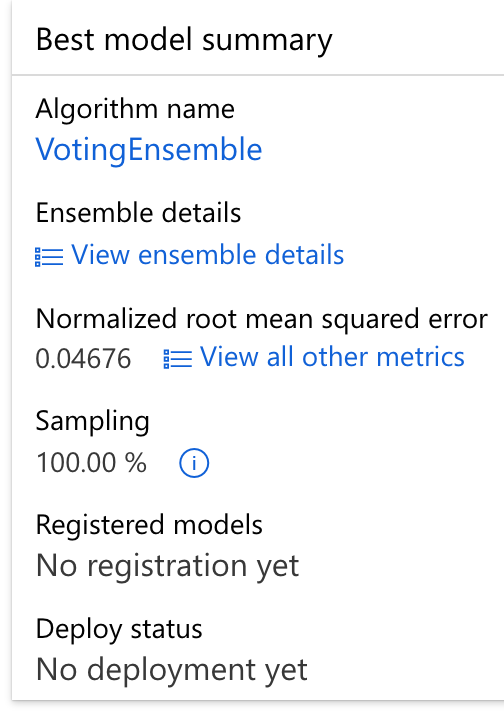

# Part 4: Model Evaluation

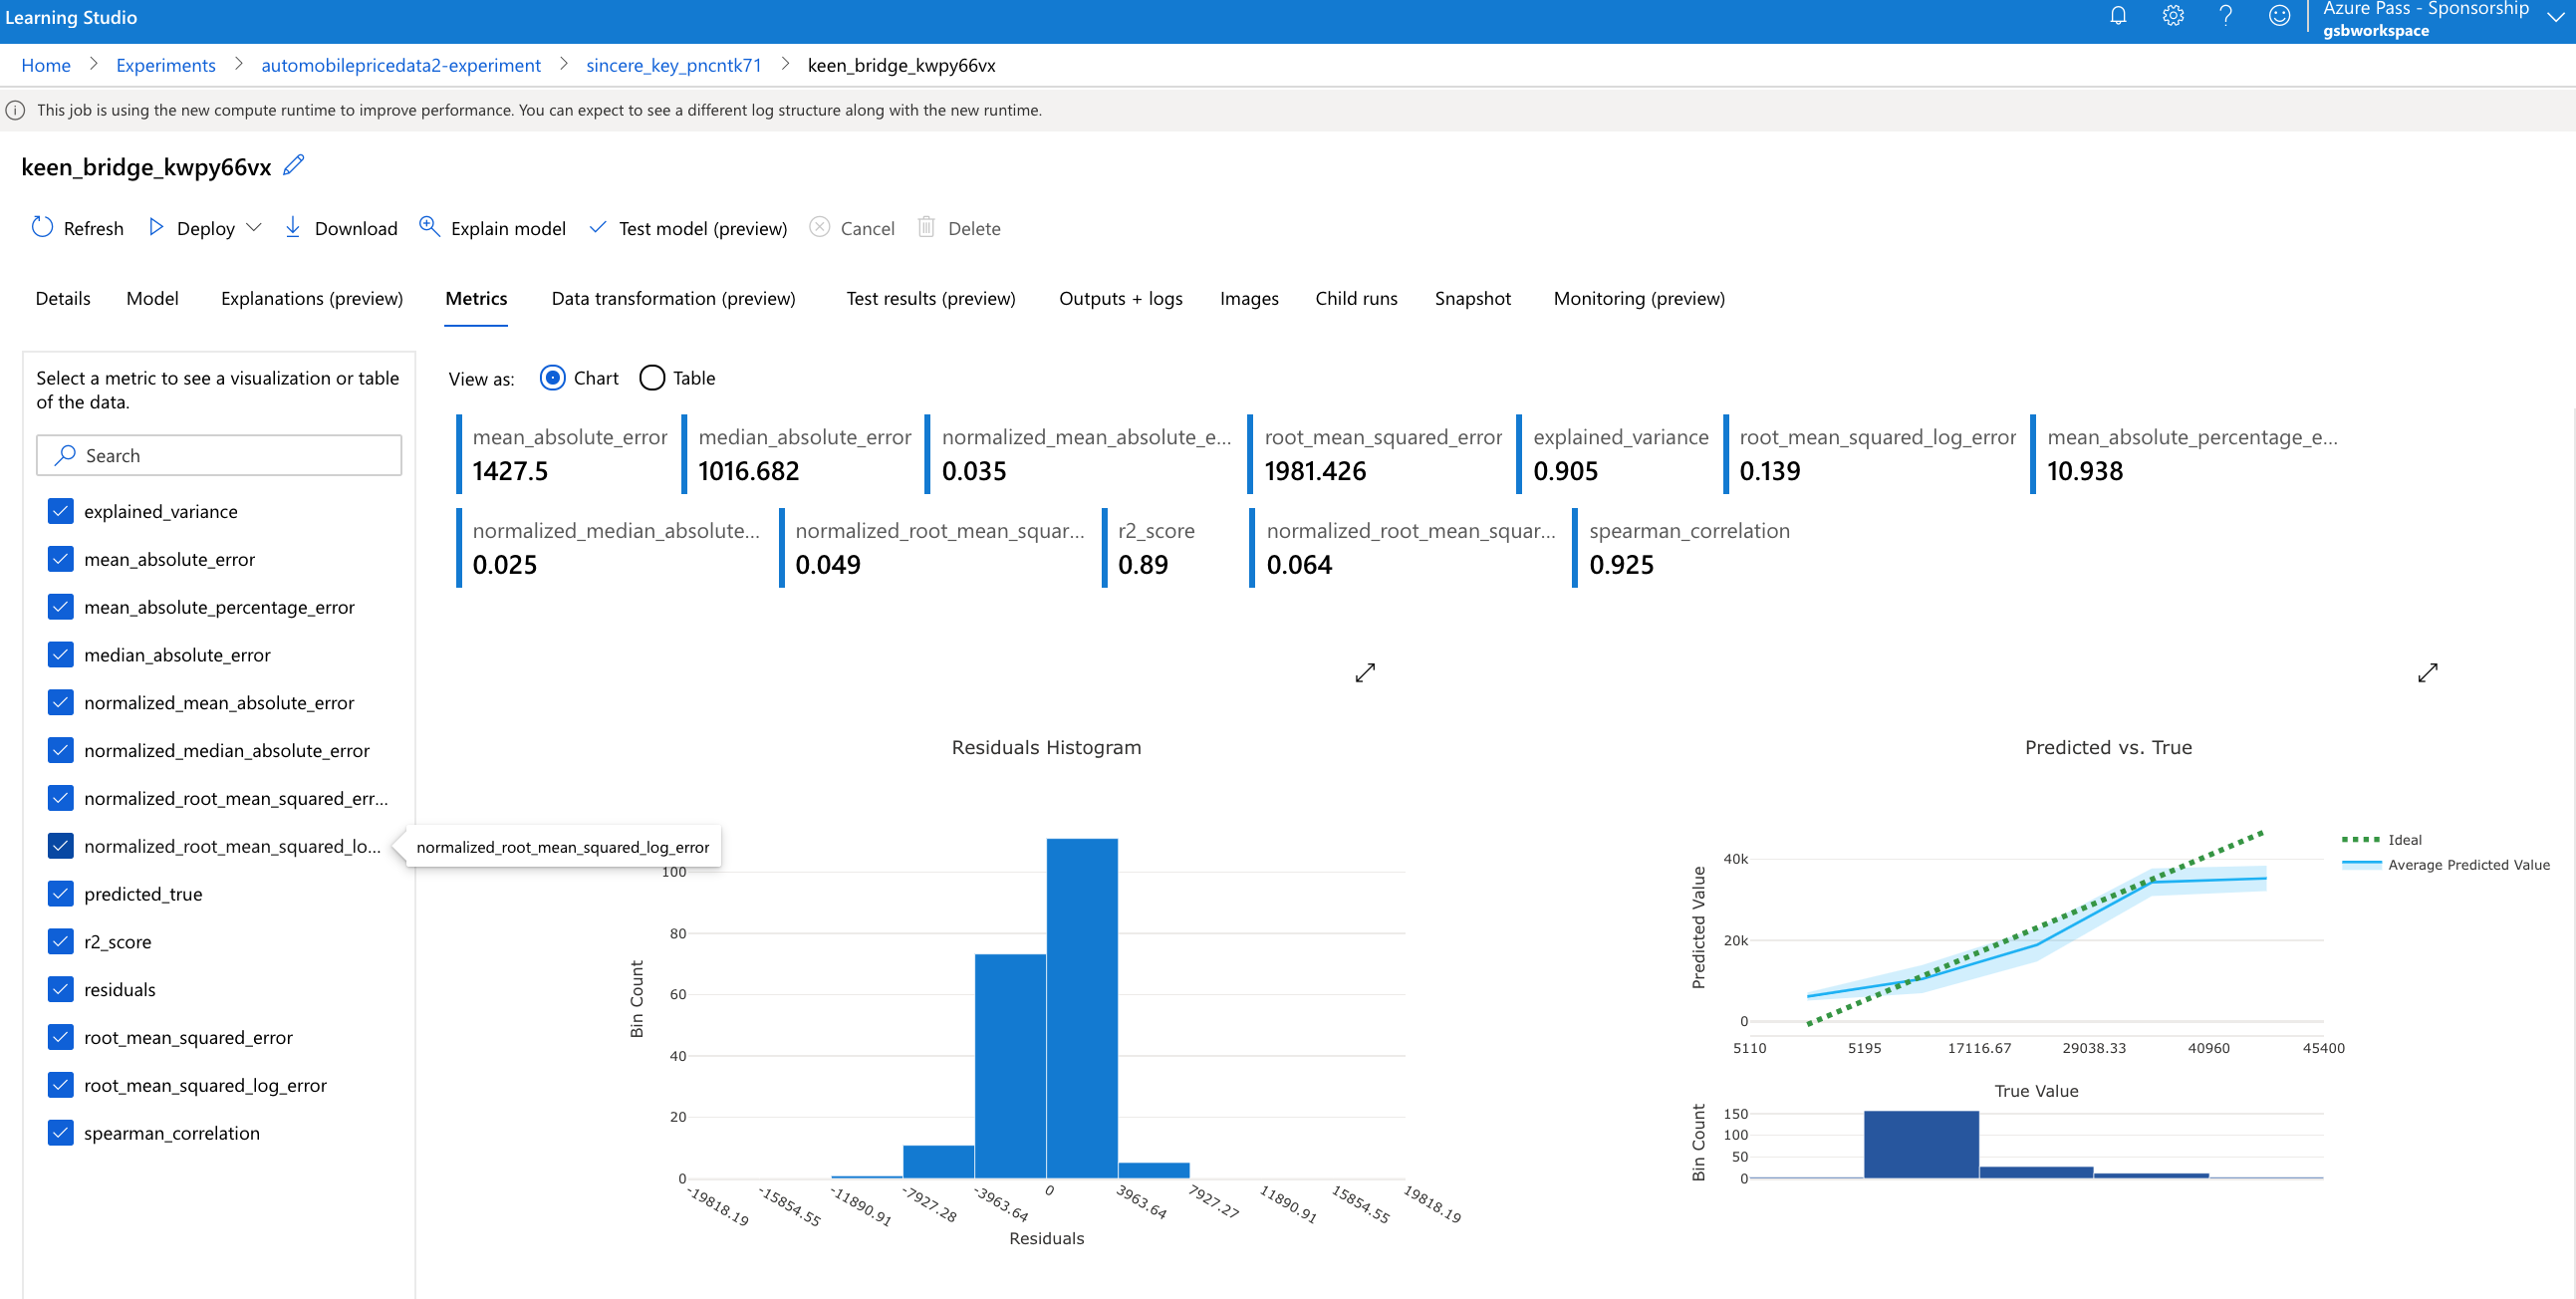

# Part 5: Stretch - Model Deployment

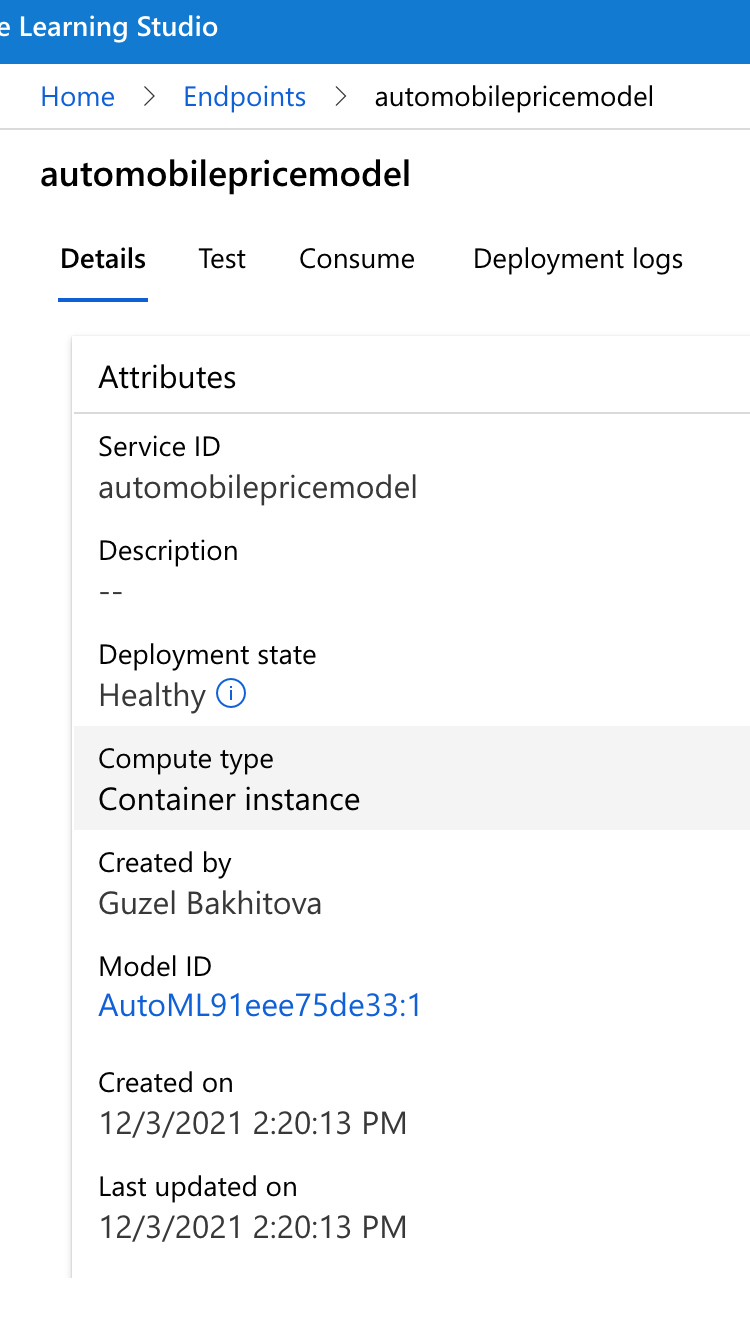

In [47]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
    "data":
    [
        {
            'symboling': "0",
            'normalized-losses': "example_value",
            'make': "example_value",
            'fuel-type': "example_value",
            'aspiration': "example_value",
            'num-of-doors': "example_value",
            'body-style': "example_value",
            'drive-wheels': "example_value",
            'engine-location': "example_value",
            'wheel-base': "0",
            'length': "0",
            'width': "0",
            'height': "0",
            'curb-weight': "0",
            'engine-type': "example_value",
            'num-of-cylinders': "example_value",
            'engine-size': "0",
            'fuel-system': "example_value",
            'bore': "example_value",
            'stroke': "example_value",
            'compression-ratio': "0",
            'horsepower': "example_value",
            'peak-rpm': "example_value",
            'city-mpg': "0",
            'highway-mpg': "0",
        },
    ],
}

body = str.encode(json.dumps(data))

url = 'http://b74e928b-c4c3-49e3-aa16-52237f2bb43c.eastus.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

b'"{\\"result\\": [229.79905091478577]}"'
